<a href="https://www.kaggle.com/code/anshtanwar/ann-activity-recognition-in-old-people?scriptVersionId=137725360" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#fff1cc; padding: 20px;">
<h1 style=" text-align:center; font-size:40px;">Activity Recognition in Senior Citizens🧓👴👵</h1>
</div>

<p style="text-align:center; ">
<img src="https://srcarecenter.com/wp-content/uploads/htypes.jpg" style='width: 1200px;height: 400px;'>
</p>


# Thanks for Visting this notebook and Using this dataset!😊
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    In this notebook I have used basic ANNs to provide a baseline model and did their hyperparameter tuning.Feel free to fork or edit the notebook.If you liked the notebook and Dataset, consider upvoting them. It helps other people discover them.
</div>

**❗Make sure to run the cells from top to bottom with a GPU accelerator.**

# About The Data
<div style="background-color:#fff1cc; padding: 20px;">
The HAR70+ dataset contains recordings of 18 older adult participants wearing two 3-axial Axivity AX3 accelerometers for around 40 minutes in a semi-structured free-living setting. The participants' age was between 70 and 95 years. Five of the 18 subjects used walking aids during data recording. One sensor was attached to the right front thigh and the other to the lower back. The provided sampling rate is 50Hz. Video recordings of a chest-mounted camera were used to annotate the performed activities frame-by-frame.

**Each subject's recordings are provided in a separate .csv file. One such .csv file contains the following columns:**

timestamp: date and time of recorded sample
> back_x: acceleration of back sensor in x-direction (down) in the unit g
back_y: acceleration of back sensor in y-direction (left) in the unit g
back_z: acceleration of back sensor in z-direction (forward) in the unit g
thigh_x: acceleration of thigh sensor in x-direction (down) in the unit g
thigh_y: acceleration of thigh sensor in y-direction (right) in the unit g
thigh_z: acceleration of thigh sensor in z-direction (backward) in the unit g
label: annotated activity code
</div>

## 📩 Importing The Modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## 📖 Reading The Data


In [2]:
#Using first 3 csv
#The more data you will concat, more time your notebook will take to run.
df_1 = pd.read_csv('/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv')
df_2 = pd.read_csv('/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv')
df_3 = pd.read_csv('/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv')


data = pd.concat([df_1,df_2,df_3], ignore_index=True, sort=False)
print(data) # Print combined DataFrame

print(f'Shape of 1 dataframeis: {df_1.shape}\nShape ofconcat data is: {data.shape}')

                      timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469   
1       2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182   
2       2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463   
3       2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520   
4       2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051   
...                         ...       ...       ...       ...       ...   
351635  2021-03-29 15:23:45.939 -0.980957 -0.091797 -0.376221 -0.942139   
351636  2021-03-29 15:23:45.959 -0.917969 -0.073486 -0.334717 -0.894287   
351637  2021-03-29 15:23:45.979 -0.839355 -0.062744 -0.325928 -0.830566   
351638  2021-03-29 15:23:46.000 -0.774414 -0.046875 -0.323486 -0.784912   
351639  2021-03-29 15:23:46.020 -0.760498 -0.066162 -0.345947 -0.768555   

         thigh_y   thigh_z  label  
0      -0.112061 -0.048096      6  
1      -0.121582 -0.051758 

In [3]:
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


## 📊 Some Analysis

In [4]:
pd.set_option("display.max_columns", None)


In [5]:
data.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label'],
      dtype='object')

In [6]:
data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,351640.000000,351640.000000,351640.000000,351640.000000,351640.000000,351640.000000,351640.000000
mean,-0.876411,-0.051413,-0.049930,-0.719096,-0.083094,-0.381786,3.587703
std,0.303613,0.118384,0.428177,0.584632,0.303634,0.525615,2.910420
min,-2.895264,-1.157471,-2.204834,-7.942139,-3.600830,-4.541748,1.000000
25%,-1.000000,-0.109375,-0.332031,-0.984863,-0.203125,-1.000000,1.000000
50%,-0.944092,-0.053711,-0.181152,-0.932617,-0.081299,-0.190918,1.000000
75%,-0.812012,0.000000,0.211670,-0.140625,0.001465,0.014160,7.000000
max,0.239746,1.207031,1.008545,2.316895,5.725098,2.079834,8.000000


In [7]:
data['label'].unique()

array([6, 3, 1, 7, 8, 5, 4])

<Axes: >

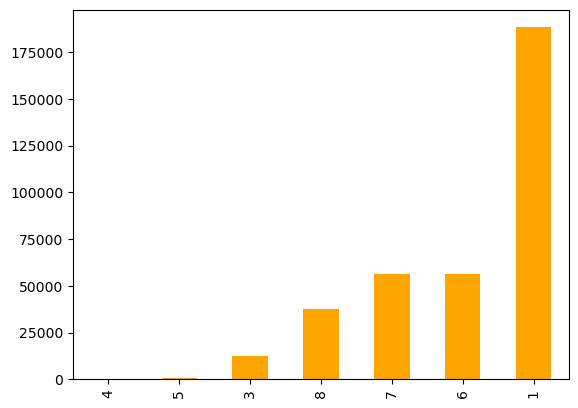

In [8]:
data['label'].value_counts().sort_values().plot(kind = 'bar', color = ['orange'])


<div style="background-color:#fff1cc; padding: 20px;">
<b>1: walking 3: shuffling 4: stairs (ascending) 5: stairs (descending) 6: standing 7: sitting 8: lying</b>
</div>

## 📈Preparing Train And Test Data

In [9]:
X = data.drop(['label','timestamp'], axis=1)
y = pd.DataFrame(data['label'])



In [10]:
X.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096
1,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758
2,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139
3,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781
4,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611


In [11]:
y.head()

,label
0,6
1,6
2,6
3,6
4,6


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


x_test.shape, y_test.shape

((70328, 6), (70328, 1))

In [13]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((70328, 6), (70328, 1), (281312, 6), (281312, 1))

In [14]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)


In [15]:
y_train.label.unique()

array([1, 3, 6, 7, 8, 5, 4])

## 🤖Creating A Base Model


<div style="background-color:#fff1cc; padding: 20px;">
    
* The code creates a sequential model with two dense layers and a dropout layer.
    
* The first dense layer has 64 units and uses the ReLU activation function.
    
* The dropout layer randomly sets 20% of the input units to 0 at each update during training time, which helps prevent overfitting.
    
* The second dense layer has 9 units and uses the softmax activation function.
    
* The model is compiled using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric.
    
* The model is then trained on the training data (x_train and y_train) for 10 epochs with a batch size of 64.
    
* The validation data (x_test and y_test) is used to evaluate the model after each epoch.
</div>




In [16]:
model = Sequential()
model.add(Dense(units=64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=9,kernel_initializer='normal',activation='softmax'))


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
4396/4396 [==============================] - 21s 4ms/step - loss: 0.7411 - accuracy: 0.7388 - val_loss: 0.5419 - val_accuracy: 0.7856
Epoch 2/10
4396/4396 [==============================] - 16s 4ms/step - loss: 0.4988 - accuracy: 0.7965 - val_loss: 0.4400 - val_accuracy: 0.8124
Epoch 3/10
4396/4396 [==============================] - 16s 4ms/step - loss: 0.4278 - accuracy: 0.8324 - val_loss: 0.3828 - val_accuracy: 0.8592
Epoch 4/10
4396/4396 [==============================] - 17s 4ms/step - loss: 0.3848 - accuracy: 0.8555 - val_loss: 0.3499 - val_accuracy: 0.8767
Epoch 5/10
4396/4396 [==============================] - 16s 4ms/step - loss: 0.3599 - accuracy: 0.8720 - val_loss: 0.3315 - val_accuracy: 0.8928
Epoch 6/10
4396/4396 [==============================] - 16s 4ms/step - loss: 0.3448 - accuracy: 0.8824 - val_loss: 0.3206 - val_accuracy: 0.9051
Epoch 7/10
4396/4396 [==============================] - 16s 4ms/step - loss: 0.3340 - accuracy: 0.8886 - val_loss: 0.3189 - val_ac

## 🎚️Hypertuning The Model

<div style="background-color:#fff1cc; padding: 20px" >
            
The code creates a RandomSearch object called tuner, which takes the build_model function as input along with other parameters such as the objective to optimize (val_accuracy), the maximum number of trials to run (max_trials), and the number of executions per trial (executions_per_trial).            
    
    

</div>


In [17]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()


Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [18]:
tuner.search(x_train, y_train,
             epochs= 3,
             validation_data=(x_test, y_test))


Trial 5 Complete [00h 12m 06s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 01h 11m 47s


# 💯 Results Summary

In [19]:
tuner.results_summary()


Results summary
Results in project/Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 19
units0: 448
initializer: uniform
activation: relu
units1: 480
units2: 32
units3: 32
units4: 32
units5: 32
units6: 32
units7: 32
units8: 32
units9: 32
units10: 32
units11: 32
units12: 32
units13: 32
units14: 32
units15: 32
units16: 32
units17: 32
units18: 32
Score: 0.0

Trial 1 summary
Hyperparameters:
num_layers: 19
units0: 288
initializer: normal
activation: tanh
units1: 64
units2: 416
units3: 416
units4: 96
units5: 416
units6: 512
units7: 32
units8: 32
units9: 32
units10: 384
units11: 256
units12: 480
units13: 480
units14: 384
units15: 352
units16: 320
units17: 320
units18: 416
Score: 0.0

Trial 2 summary
Hyperparameters:
num_layers: 25
units0: 416
initializer: uniform
activation: tanh
units1: 352
units2: 192
units3: 96
units4: 416
units5: 64
units6: 448
units7: 352
units8: 96
units9: 160
units10: 32
unit

In [20]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))
model.summary()


Epoch 1/10
8791/8791 [==============================] - 81s 8ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
8791/8791 [==============================] - 78s 9ms/step - loss: nan - accuracy: 0.0896 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
8791/8791 [==============================] - 74s 8ms/step - loss: nan - accuracy: 0.0901 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
8791/8791 [==============================] - 73s 8ms/step - loss: nan - accuracy: 0.0900 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
8791/8791 [==============================] - 73s 8ms/step - loss: nan - accuracy: 0.0894 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
8791/8791 [==============================] - 74s 8ms/step - loss: nan - accuracy: 0.0896 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
8791/8791 [==============================] - 73s 8ms/step - loss: nan - accuracy: 0.0900 - val_loss: nan - val_accuracy: 0.0000e+00

In [21]:

import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=50, validation_data=(x_test,y_test), callbacks=Callback)

Epoch 1/50
8791/8791 [==============================] - 74s 8ms/step - loss: nan - accuracy: 0.0897 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
8791/8791 [==============================] - 75s 9ms/step - loss: nan - accuracy: 0.0895 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
8791/8791 [==============================] - 76s 9ms/step - loss: nan - accuracy: 0.0895 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
8791/8791 [==============================] - 77s 9ms/step - loss: nan - accuracy: 0.0902 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
8791/8791 [==============================] - 79s 9ms/step - loss: nan - accuracy: 0.0887 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
8791/8791 [==============================] - 75s 8ms/step - loss: nan - accuracy: 0.0881 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
8791/8791 [==============================] - 78s 9ms/step - loss: nan - accuracy: 0.0889 - val_loss: nan - val_accuracy: 0.0000e+00

In [22]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']

In [23]:
model

# <div style="background-color:#fff1cc; padding: 20px;">In this notebook we have done a classification problem where we are predicting the activity of the old person from the basic sensor readings. As the author of dataset and this notebook I Thank you for viewing my work.If you like it, consider sharing it to others or give feedback to improve the notebook and Dataset 😊.

 </div>